KNN Regressor:
1. Import Dataset
2. separete x,y
3. train, test
4.Apply Linear Regression
5.Evaluate Model
Apply KNN Regressor
Evaluate model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Height-Weight.xlsx")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df1 = df.copy()
df2 = df.copy()

In [5]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [7]:
df.shape

(8555, 3)

In [8]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
df1=df.drop('Gender', axis=1)

In [10]:
df1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [11]:
df1.corr()

,Height,Weight
Height,1.000000,0.922975
Weight,0.922975,1.000000


# Label Encoding

In [12]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [13]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


# Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0, 1))

In [16]:
df['Height'] = mm.fit_transform(df[['Height']])

In [17]:
df.head()

,Gender,Height,Weight
0,1,0.744399,241.893563
1,1,0.548328,162.310473
2,1,0.754583,212.740856
3,1,0.662487,220.042470
4,1,0.590905,206.349801


# Separete x,y

In [18]:
 x = df.drop('Weight', axis=1)
x.head()

,Gender,Height
0,1,0.744399
1,1,0.548328
2,1,0.754583
3,1,0.662487
4,1,0.590905


In [19]:
y = df[['Weight']]
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


# Split Train & Test

In [20]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [21]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.3, random_state=78)

In [22]:
xtrain.head()

,Gender,Height
2984,1,0.516626
6487,0,0.296121
7243,0,0.284884
6898,0,0.218997
6136,0,0.416769


In [23]:
ytrain.head()

,Weight
2984,190.964765
6487,138.381679
7243,141.855825
6898,106.853924
6136,129.375502


In [24]:
xtrain.shape

(5988, 2)

In [25]:
ytrain.shape

(5988, 1)

# Applying Linear Regression

In [26]:
ln = LinearRegression()

In [27]:
ln.fit(xtrain,ytrain)

LinearRegression()

In [28]:
pred = ln.predict(xtest)

In [29]:
pred

array([[187.53844321],
       [140.10544754],
       [162.886255  ],
       ...,
       [174.14561879],
       [126.51552617],
       [227.16421198]])

In [30]:
ln .predict([[0,0.356]])

array([[136.45635696]])

# Accuracy,MSE, MAE

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
accuracy = r2_score(ytest,pred)

In [33]:
accuracy

0.8999186031764108

In [34]:
mae = mean_absolute_error(ytest,pred)

In [35]:
mae

8.096114041702727

In [36]:
mse = mean_squared_error(ytest,pred)

In [37]:
mse

105.07227399923437

# Visualization

In [38]:
xtrain.head()

,Gender,Height
2984,1,0.516626
6487,0,0.296121
7243,0,0.284884
6898,0,0.218997
6136,0,0.416769


In [39]:
xtrain1 = xtrain.drop('Gender', axis=1)

In [40]:
xtrain1.head()

,Height
2984,0.516626
6487,0.296121
7243,0.284884
6898,0.218997
6136,0.416769


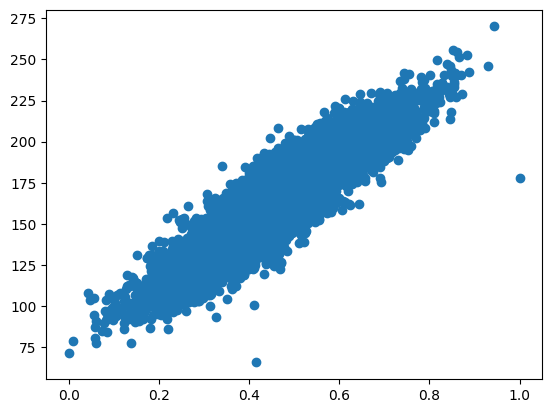

In [41]:
plt.scatter(xtrain1,ytrain)

###### Applying KNN Regression

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
ne = KNeighborsRegressor(n_neighbors = 10)

In [44]:
ne.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=10)

In [45]:
kntest = ne.predict(xtest)

In [46]:
kntest

array([[186.98045035],
       [142.84803409],
       [155.91317517],
       ...,
       [174.63819434],
       [126.01561003],
       [229.65089698]])

In [47]:
ne.predict([[0,0.356]])

array([[137.38458453]])

# Evaluate Model

In [48]:
r2_score(ytest,kntest)

0.8896589115374288

In [49]:
mse =mean_squared_error(ytest,kntest)

In [50]:
mse

115.84359779419448

In [51]:
mae = mean_absolute_error(ytest,kntest)

In [52]:
mae

8.489224366719517